<h1>Taller 8: Algorito Geonétrico</h1>

Librerias:

In [1]:
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from sympy.geometry import *
from sympy import Point, Line

<h2>Punto 1</h2>

<i>What is the intersection between two line segments $S_i$ and $S_j$?</i>

In [2]:
def ecuation_line(point1, point2):
    A = (point1[1] - point2[1])
    B = (point2[0] - point1[0])
    C = (point1[0]*point2[1] - point2[0]*point1[1])
    return A, B, -C

def intersection(line1, line2):
    D  = line1[0] * line2[1] - line1[1] * line2[0]
    Dx = line1[2] * line2[1] - line1[1] * line2[2]
    Dy = line1[0] * line2[2] - line1[2] * line2[0]
    
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x, y
    else:
        return False

def graph_intersection(line1, line2, interc):
    fig, ax = plt.subplots(figsize=(8, 8))
    x = np.linspace(-100, 100)
    y1 = (line1[2]/line1[1])-(line1[0]/line1[1])*x
    y2 = (line2[2]/line2[1])-(line2[0]/line2[1])*x

    plt.plot(x, y1, lw=3, label=r'$Line 1$')
    plt.plot(x, y2 , lw=3, label=r'$Line 2$')
    plt.plot(interc[0], interc[1], 'o', color='red')

    plt.xlabel(r'$x$', fontsize=16)
    plt.ylabel(r'$y$', fontsize=16)
    plt.xlim(-2, 14)
    plt.ylim(-2, 14)
    plt.legend(fontsize=14)
    plt.show()

Intercepción: (1, 2)


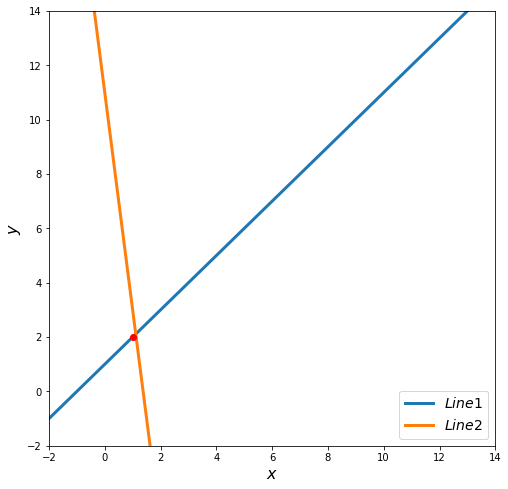

In [3]:
line1 = ecuation_line([0,1], [2,3])
line2 = ecuation_line([1,3], [2,-5])
interc = intersection(line1, line2)

if interc:
    print "Intercepción:", interc
    graph_intersection(line1, line2, interc)
else:
    print "No tiene intercepción."

<h2>Punto 2</h2>

<i>Is a given point $P$ contained in the line segment $S$?</i>

In [4]:
def contained_point(line, point):
    if point[1] == (line[2]/line[1])-(line[0]/line[1])*(point[0]):
        return True
    else:
        return False

def graph_contained_point(line, point):
    fig, ax = plt.subplots(figsize=(8, 8))
    x = np.linspace(-100, 100)
    y = (line[2]/line[1])-(line[0]/line[1])*x

    plt.plot(x, y, lw=3)
    plt.plot(point[0],point[1], 'o', color='red')

    plt.xlabel(r'$x$', fontsize=16)
    plt.ylabel(r'$y$', fontsize=16)
    plt.xlim(-2, 14)
    plt.ylim(-2, 14)
    plt.legend(fontsize=14)
    plt.show()

True


D:\Users\oscar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


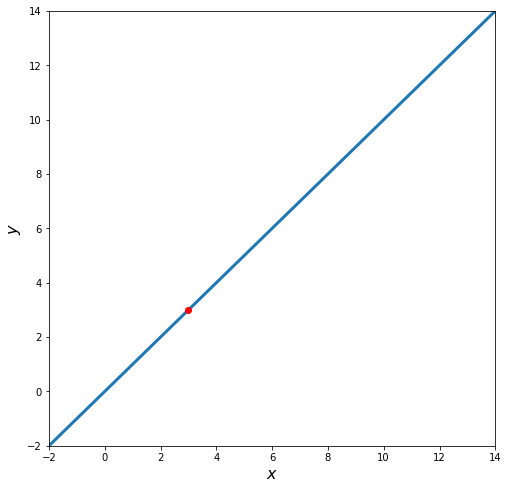

False


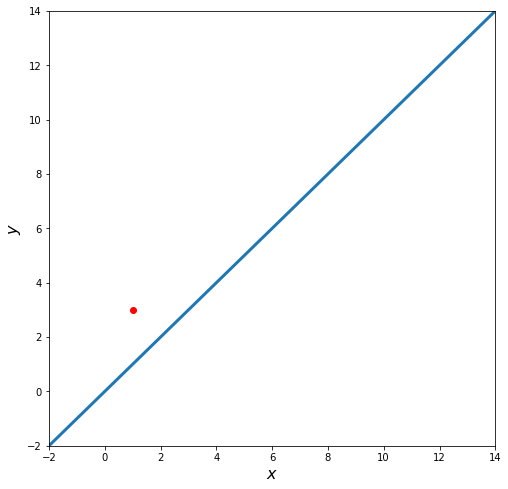

In [5]:
line = ecuation_line([2,2], [1,1])
point1 = [3, 3]
point2 = [1, 3]

print contained_point(line, point1)
graph_contained_point(line, point1)
print contained_point(line, point2)
graph_contained_point(line, point2)

<h2>Punto 3</h2>

<i>What is the distance from a point $P$ to the line $L$?</i>

In [6]:
def distance_point_line(line, point):
    return line.distance(point)

In [7]:
p1 = Point(1, 1)
p2 = Point(1, 2)
p0 = Point (-1, 1)

dist = distance_point_line(Line(p1, p2), p0)
print 'La distancia entre la recta y el punto es de:', dist

La distancia entre la recta y el punto es de: 2


<h2>Punto 4</h2>

<i>What is an ortogonal line $L_i$ which intersect $L_j$ at an arbitrary point?</i>

In [8]:
def orthogonal_line(line, point):
    ort = line.perpendicular_line(point)
    return ort.equation()

In [9]:
ort = orthogonal_line(Line(p1, p2), p0)
print "La recta ortogonal es:", ort

La recta ortogonal es: y - 1


<h2>Punto 5</h2>

<i>What is a line $L_i$ parallel to $L_j$ with a distance $d$?</i>

In [10]:
def parallel_line(p1, p2, distance):
    line = Line(p1, p2)
    p = p1.translate(distance)
    par = line.parallel_line(p)
    return par.equation()

In [11]:
distance = 5
par = parallel_line(p1, p2, distance)
print "La recta parallela es:", par

La recta parallela es: x - 6


<h2>Punto 6</h2>

<i>Implement an divide-and-coquer algorithm which run in time $O(n\lg n)$</i>

<b>Coloring Voronoi diagram</b>

In [12]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

def voronoi_finite_polygons_2d(vor, radius=None):
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            t = vor.points[p2] - vor.points[p1]
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

def graph_voronoi():
    np.random.seed(1234)
    points = np.random.rand(15, 2)

    vor = Voronoi(points)

    regions, vertices = voronoi_finite_polygons_2d(vor)

    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon), alpha=0.4)

    plt.plot(points[:,0], points[:,1], 'ko')
    plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

    plt.show()

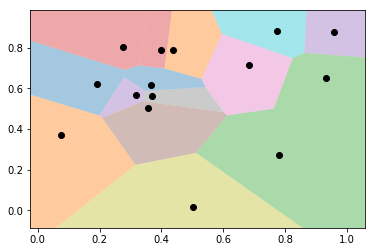

In [13]:
graph_voronoi()

<h2>Punto 7</h2>

<i>Research about algorithms to compute Voronoi diagrams. Describe and discuss the algorithms reviewed.</i>

<b>Algoritmo de Fortune</b>
<br>Complejidad: $O(n\lg n)$</br>
<br>El algoritmo de Fortune está basado en una de las técnicas clave dentro de la geometría computacional denominada barrido de recta. La esencia de esta técnica yace en suponer que existe una recta $L$ que recorre el plano de arriba hacia abajo y que a lo largo de su recorrido se interseca con las estructuras que deseamos procesar.</br>
<br>Este es una variación de los algoritmos tipo <i>sweep line</i> aplicado al cálculo del diagrama de Voronoi.</br>
<br>El problema al barrer el plano con una línea es que la parte del diagrama que cae por encima de la línea puede modificarse por puntos que están debajo.</br>
<br>Para evitar este problema se construye la <i>beach line</i>, el conjunto de puntos que equidistan de la <i>sweep line</i> y algún pi por encima de la <i>sweep line</i>.


<b>Algoritmo de Divide y Conquista</b>
<br>Complejidad: $O(n\lg n)$</br>
<br> Dado el problema de construir el diagrama de Voronói para el conjunto
${\displaystyle P}$ de sitios, ahora se dividirá a este último en dos subconjuntos ${\displaystyle P_{1}}$ y ${\displaystyle P_{2}}$, con aproximadamente el mismo tamaño, de los que se debe encontrar su diagrama de Voronoi independientemente. Finalmente, ${\displaystyle Vor(P_{1})}$ y ${\displaystyle Vor(P_{2})}$ deben ser unidos para poder obtener ${\displaystyle Vor(P)}$.


<b>Algoritmo de Duerza Bruta</b>
<br>Complejidad: $O(n^2\lg n)$</br>
<br> Una promera aproximación para el diagrama de Voronói, donde se consiste enumerar sistemáticamente todos los posibles candidatos para la solución de un problema, con el fin de chequear si dicho candidato satisface la solución al mismo.</br>
<br>Este algoritmo tiene muchas desventajas de entre las cuales se tienen las que a continuación se describen:</br>
1. El cálculo explícito de los semi-planos y su intersección puede provocar problemas de precisión en la computadora generado, evidentemente.
2. Involucra que no se produce información inmediata y que se pueda aprovechar acerca del vecindario de cada sitio.
3. No resulta extraño descubrir que su complejidad computacional sea alta.

<br>Referencias:</br>
<br>http://asignatura.us.es/fgcitig/contenidos/gctem3ma.htm</br>
<br>http://blog.ivank.net/fortunes-algorithm-and-implementation.html</br>
<br>https://es.wikipedia.org/wiki/Pol%C3%ADgonos_de_Thiessen#Algoritmo_por_fuerza_bruta</br>